In [0]:
import pandas as pd 
import numpy as np


In [0]:
data=pd.read_csv("train.csv")

In [77]:
data.pop("Loan_ID")
data.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [78]:
#pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
data['Gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Married'].replace(['Yes','No'],[1,0],inplace=True)
data['Education'].replace(['Graduate','Not Graduate'],[1,0],inplace=True)
data['Self_Employed'].replace(['Yes','No'],[1,0],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null float64
Married              611 non-null float64
Dependents           599 non-null object
Education            614 non-null int64
Self_Employed        582 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(7), int64(2), object(3)
memory usage: 57.6+ KB


In [80]:
data['Loan_Status'].replace(['Y','N'],[1,0],inplace=True)
data['Property_Area'].replace(['Urban','Semiurban','Rural'],[2,1,0],inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [81]:
data.Dependents.unique()
data['Dependents'].replace(['0','1','2','3+'],[0,1,2,4],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null float64
Married              611 non-null float64
Dependents           599 non-null float64
Education            614 non-null int64
Self_Employed        582 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(8), int64(4)
memory usage: 57.6 KB


In [86]:
data.isnull().sum()

Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
pd.crosstab([data.Married],data.Loan_Status).style.background_gradient(cmap='summer_r')

Loan_Status,0,1
Married,,
0.0,79,134
1.0,113,285


In [84]:
data[data['Married'].isnull()]
data['Married'].fillna(1,inplace=True)
data[data['Loan_Amount_Term'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,0.0,1.0,0.0,1,NaN,2600,3500.0,115.0,NaN,1.0,2,1
36,0.0,1.0,0.0,1,0.0,1828,1330.0,100.0,NaN,0.0,2,0
44,0.0,1.0,0.0,0,1.0,4695,0.0,96.0,NaN,1.0,2,1
45,1.0,0.0,0.0,1,0.0,3410,0.0,88.0,NaN,1.0,2,1
73,0.0,1.0,4.0,0,0.0,4755,0.0,95.0,NaN,0.0,1,0
112,0.0,1.0,0.0,0,0.0,3572,4114.0,152.0,NaN,0.0,0,0
165,0.0,1.0,0.0,1,0.0,3707,3166.0,182.0,NaN,1.0,0,1
197,1.0,0.0,0.0,0,0.0,1907,2365.0,120.0,NaN,1.0,2,1
223,0.0,1.0,0.0,1,0.0,7578,1010.0,175.0,NaN,1.0,1,1
232,0.0,0.0,0.0,0,0.0,3189,2598.0,120.0,NaN,1.0,0,1


In [65]:
data[data['Loan_Amount_Term'].isnull()]
pd.crosstab([data.Loan_Amount_Term],data.Loan_Status).style.background_gradient(cmap='summer_r')

Loan_Status,0,1
Loan_Amount_Term,,
1.0,6,8
12.0,0,1
36.0,2,0
60.0,0,2
84.0,1,3
120.0,0,3
180.0,15,29
240.0,1,3
300.0,5,8


In [0]:
data.loc[(data.Loan_Amount_Term.isnull())&(data.Loan_Status==1),'Loan_Amount_Term']=360
data.loc[(data.Loan_Amount_Term.isnull())&(data.Loan_Status==0),'Loan_Amount_Term']=480

In [90]:
pd.crosstab([data.Dependents],data.Loan_Status).style.background_gradient(cmap='summer_r')
#pd.crosstab([data.Dependents],data.Education).style.background_gradient(cmap='summer_r')


Loan_Status,0,1
Dependents,,
0.0,107,238
1.0,36,66
2.0,25,76
4.0,18,33


In [111]:

data[data['Dependents'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
301,0.0,1.0,NaN,0,0.0,2875,1750.0,105.0,360.0,1.0,1,1


In [0]:
data.loc[(data.Dependents.isnull())&(data.Loan_Status==1),'Dependents']=0
data.loc[(data.Dependents.isnull())&(data.Loan_Status==0)&(data.Education==0),'Dependents']=4
data.loc[(data.Dependents.isnull())&(data.Loan_Status==0)&(data.Education==1),'Dependents']=2


In [113]:
data.isnull().sum()


Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
data[data['Gender'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,1.0,2.0,0,0.0,3365,1917.0,112.0,360.0,0.0,0,0
126,NaN,1.0,4.0,1,0.0,23803,0.0,370.0,360.0,1.0,0,1
171,NaN,1.0,4.0,1,0.0,51763,0.0,700.0,300.0,1.0,2,1
188,NaN,1.0,0.0,1,1.0,674,5296.0,168.0,360.0,1.0,0,1
314,NaN,1.0,0.0,1,0.0,2473,1843.0,159.0,360.0,1.0,0,0
334,NaN,1.0,1.0,1,1.0,9833,1833.0,182.0,180.0,1.0,2,1
460,NaN,1.0,0.0,1,1.0,2083,4083.0,160.0,360.0,NaN,1,1
467,NaN,1.0,0.0,1,0.0,16692,0.0,110.0,360.0,1.0,1,1
477,NaN,1.0,2.0,1,0.0,2873,1872.0,132.0,360.0,0.0,1,0
507,NaN,0.0,0.0,1,0.0,3583,0.0,96.0,360.0,1.0,2,0


In [0]:
data.loc[(data.Gender.isnull())&(data.Loan_Status==1),'Gender']=0
data.loc[(data.Gender.isnull())&(data.Married==0),'Gender']=1
data.loc[(data.Gender.isnull())&(data.Loan_Status==0),'Gender']=1


In [99]:
pd.crosstab([data.Credit_History],data.Loan_Status).style.background_gradient(cmap='summer_r')

Loan_Status,0,1
Credit_History,,
0.0,82,7
1.0,97,378


In [0]:
data.loc[(data.Credit_History.isnull())&(data.Loan_Status==1),'Credit_History']=1
data.loc[(data.Credit_History.isnull())&(data.Loan_Status==0),'Credit_History']=0

In [108]:
pd.crosstab([data.Loan_Status],data.Gender).style.background_gradient(cmap='summer_r')

Gender,0.0,1.0
Loan_Status,,
0,150,42
1,347,75


In [0]:
data.loc[(data.Self_Employed.isnull())&(data.Loan_Status==1)&(data.Gender==0),'Self_Employed']=1
data.loc[(data.Self_Employed.isnull())&(data.Gender==0),'Self_Employed']=0
data.loc[(data.Self_Employed.isnull())&(data.Loan_Status==0)&(data.Gender==1),'Self_Employed']=0
data.loc[(data.Self_Employed.isnull())&(data.Loan_Status==1),'Self_Employed']=0
data.loc[(data.Self_Employed.isnull())&(data.Loan_Status==0),'Self_Employed']=1


In [103]:
data[data['Self_Employed'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,0.0,1.0,2.0,1,NaN,2500,1840.0,109.0,360.0,1.0,2,1
19,0.0,1.0,0.0,1,NaN,2600,3500.0,115.0,360.0,1.0,2,1
24,0.0,1.0,1.0,1,NaN,3717,2925.0,151.0,360.0,0.0,1,0
29,1.0,0.0,2.0,1,NaN,3750,2083.0,120.0,360.0,1.0,1,1
30,0.0,1.0,1.0,1,NaN,4166,3369.0,201.0,360.0,0.0,2,0
95,0.0,0.0,0.0,1,NaN,6782,0.0,NaN,360.0,0.0,2,0
107,0.0,0.0,0.0,0,NaN,7333,0.0,120.0,360.0,1.0,0,0
111,1.0,1.0,0.0,1,NaN,2929,2333.0,139.0,360.0,1.0,1,1
114,0.0,0.0,0.0,1,NaN,5050,0.0,118.0,360.0,1.0,1,1
158,0.0,0.0,0.0,1,NaN,2980,2083.0,120.0,360.0,1.0,0,1


In [125]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [121]:
data['LoanAmount'].median()

128.0

In [0]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

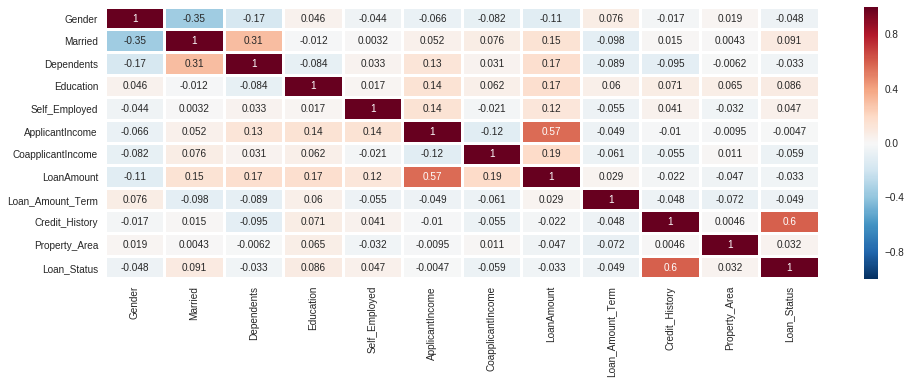

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (16,5))
sns.heatmap(data.corr(),annot = True,linewidths=2)

In [0]:
data.pop('ApplicantIncome')
#from sklearn.model_selection import train_test_split
x=data.drop(labels='Loan_Status',axis=1)
y=data['Loan_Status']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=11)

In [130]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [131]:
from sklearn import metrics
metrics.accuracy_score(clf.predict(x_test),y_test)

0.8162162162162162

In [166]:
dtest=pd.read_csv("test.csv")
dtest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [167]:
#dtest.pop('Loan_ID')
dtest.pop('ApplicantIncome')

dtest.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [168]:
dtest.info()
#sns.pairplot(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 31.6+ KB


In [0]:
dtest['Gender'].replace(['Male','Female'],[0,1],inplace=True)
dtest['Married'].replace(['Yes','No'],[1,0],inplace=True)
dtest['Education'].replace(['Graduate','Not Graduate'],[1,0],inplace=True)
dtest['Self_Employed'].replace(['Yes','No'],[1,0],inplace=True)
#dtest['Loan_Status'].replace(['Y','N'],[1,0],inplace=True)
dtest['Property_Area'].replace(['Urban','Semiurban','Rural'],[2,1,0],inplace=True)
dtest['Dependents'].replace(['0','1','2','3+'],[0,1,2,4],inplace=True)
dtest['Married'].fillna(1,inplace=True)
dtest.loc[(dtest.Loan_Amount_Term.isnull()),'Loan_Amount_Term']=360
#dtest.loc[(dtest.Loan_Amount_Term.isnull())&(dtest.Loan_Status==0),'Loan_Amount_Term']=480
#dtest.loc[(dtest.Dependents.isnull())&(dtest.Loan_Status==1),'Dependents']=0
dtest.loc[(dtest.Dependents.isnull())&(dtest.Education==0),'Dependents']=4
dtest.loc[(dtest.Dependents.isnull())&(dtest.Education==1),'Dependents']=0
#dtest.loc[(dtest.Gender.isnull())&(dtest.Loan_Status==1),'Gender']=0
dtest.loc[(dtest.Gender.isnull())&(dtest.Married==0),'Gender']=1
dtest.loc[(dtest.Gender.isnull())&(dtest.Married==1),'Gender']=0
dtest.loc[(dtest.Credit_History.isnull())&(dtest.Gender==1),'Credit_History']=0
dtest.loc[(dtest.Credit_History.isnull())&(dtest.Gender==0),'Credit_History']=1
dtest.loc[(dtest.Self_Employed.isnull())&(dtest.Gender==0),'Self_Employed']=1
#dtest.loc[(dtest.Self_Employed.isnull())&(dtest.Gender==0),'Self_Employed']=0
dtest.loc[(dtest.Self_Employed.isnull())&(dtest.Gender==1),'Self_Employed']=0
#dtest.loc[(dtest.Self_Employed.isnull())&(dtest.Loan_Status==1),'Self_Employed']=0
#dtest.loc[(dtest.Self_Employed.isnull())&(dtest.Loan_Status==0),'Self_Employed']=1
dtest['LoanAmount'].fillna(dtest['LoanAmount'].median(),inplace=True)

In [170]:
dtest.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [0]:
sub=pd.read_csv('Sample_Submission.csv')
sub['Loan_ID']=dtest['Loan_ID']
dtest.pop("Loan_ID")
d_pre=clf.predict(dtest)

In [172]:
d_pre

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [0]:
#sub=pd.read_csv('Sample_Submission.csv')
sub['Loan_Status']=d_pre
sub['Loan_Status'].replace([1,0],['Y','N'],inplace=True)

In [176]:
sub.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
